## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import shap


%matplotlib inline

## Load and Explore data

In [2]:
train = pd.read_csv(r"../data/train.csv")
train.columns = [col.strip().lower() for col in train.columns]
print(f"The shape of the train data: {train.shape}")
train.sample(3)

The shape of the train data: (150000, 32)


,id,time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,transaction_amount,isfraud
39171,39171,39788.0,-0.383828,0.493765,-1.651449,-1.974682,1.895848,3.476057,-0.285875,1.263980,-1.406923,0.016517,-0.814251,-0.250239,-0.305529,0.676434,-0.064171,-1.868986,-0.082541,1.480116,-0.724662,-0.486798,-0.079906,0.218063,0.066771,0.849663,-0.484870,-0.446469,0.290546,0.156814,10.00,0
127550,127550,67966.0,1.237515,-1.390748,1.684917,-0.151340,-2.150457,0.735181,-1.859274,0.378714,0.926228,-0.262634,-0.001824,0.235905,-0.966185,-1.276947,-2.227813,0.401665,1.135799,-1.087729,1.351828,-0.064121,0.153944,0.882045,-0.003879,0.398248,0.156580,-0.051836,0.085341,0.013724,3.00,0
111887,111887,63707.0,1.048793,0.140537,1.349820,2.337779,-0.318953,1.281314,-0.816296,0.516915,-0.234813,0.578888,-0.496423,-0.207599,0.031468,-0.056223,1.664983,0.769238,-0.440824,-0.456775,-1.946656,-0.188644,0.244723,0.779582,0.011544,-0.636605,0.122989,0.089816,0.071115,0.029643,10.65,0


In [3]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]
print(f"The shape of the test data: {test.shape}")
test.sample(3)

The shape of the test data: (69129, 31)


,id,time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,transaction_amount
66833,216833,119801,-0.917018,-0.291546,-0.406660,-0.011833,-2.684714,-0.997701,-1.361556,1.486699,-1.942106,1.592756,-0.079249,-1.043421,-0.097350,0.067689,1.117700,-0.672549,-0.298041,-0.471539,-0.049891,0.217642,0.552740,1.076040,0.216295,0.676640,-0.715799,1.355600,0.174928,0.062964,160.00
23492,173492,79870,-0.993749,-0.361624,0.263929,1.190969,1.168817,-0.125955,-0.436570,0.491271,-0.907360,0.837891,-0.341869,0.176437,-0.120977,0.555736,-0.967890,0.926709,0.428866,-0.077938,-0.022513,0.392748,-0.341911,-0.912175,-0.006918,-0.173935,-0.074955,0.074778,0.181538,0.034122,2.69
45502,195502,89550,-0.182801,-0.636004,0.054981,1.098793,-0.403936,-0.731998,-0.939777,0.826168,-0.271839,1.014222,-0.253524,0.299449,0.171395,0.310013,-0.129511,-0.296989,-0.077750,-0.657916,-0.076439,0.235966,-0.371902,-0.706095,0.099482,0.063767,-0.313673,0.155067,0.466901,0.193326,1.29


In [4]:
# check for missing data

data = pd.concat([train, test])

print(f'missing data in train set: {train.isnull().sum().sum()}')
print(f'missing data in test set: {test.isnull().sum().sum()}')

missing data in train set: 0
missing data in test set: 0


In [5]:
# check for duplicated data
print(f'duplicate data in train set: {train.duplicated().sum().sum()}')
print(f'duplicate data in test set: {test.duplicated().sum().sum()}')

duplicate data in train set: 0
duplicate data in test set: 0


In [6]:
# exploring train data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,74999.500000,43301.414527,0.000000,37499.750000,74999.500000,112499.250000,149999.000000
time,150000.0,49785.422340,18733.655609,0.000000,39411.000000,53785.000000,63833.000000,73899.000000
feat1,150000.0,0.069456,1.346553,-22.173926,-0.844248,0.671327,1.171271,2.390816
feat2,150000.0,-0.003674,1.161502,-44.247914,-0.621724,0.003677,0.753340,16.068473
feat3,150000.0,0.739860,1.012801,-19.088980,0.181373,0.826497,1.360362,6.145578
feat4,150000.0,0.104810,1.230909,-5.069484,-0.738399,0.095342,0.967657,12.547997
feat5,150000.0,-0.254623,1.048268,-21.090735,-0.912254,-0.322525,0.242796,34.581260
feat6,150000.0,0.151934,1.182964,-25.659750,-0.590892,-0.068690,0.492931,15.082516
feat7,150000.0,-0.165443,0.802668,-31.179799,-0.667139,-0.144551,0.334553,23.256066
feat8,150000.0,0.166254,0.691267,-28.903442,-0.078114,0.125052,0.396056,18.270586


In [7]:
# exploring test data
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69129.0,184564.000000,19955.967716,150000.000000,167282.000000,184564.000000,201846.000000,219128.000000
time,69129.0,89700.231495,15119.656332,73899.000000,78165.000000,82812.000000,99073.000000,120580.000000
feat1,69129.0,0.153621,1.494379,-29.807725,-0.849946,-0.013829,1.292617,2.430494
feat2,69129.0,0.024798,0.706959,-19.105436,-0.444879,-0.031276,0.396541,6.867874
feat3,69129.0,-0.091934,0.885260,-22.092656,-0.594470,-0.172084,0.292818,15.878405
feat4,69129.0,0.161219,1.148045,-39.517039,-0.486516,0.123914,0.891948,13.678867
feat5,69129.0,0.271489,1.300909,-19.722872,-0.534338,0.426266,1.174539,4.241399
feat6,69129.0,-0.007837,1.296690,-5.263650,-0.829899,-0.042488,0.780126,12.268942
feat7,69129.0,0.115694,0.959655,-3.210967,-0.593737,0.069868,0.856364,5.859398
feat8,69129.0,0.040389,1.087216,-37.591259,-0.671718,-0.018824,0.613933,20.976643


## Exploring the data

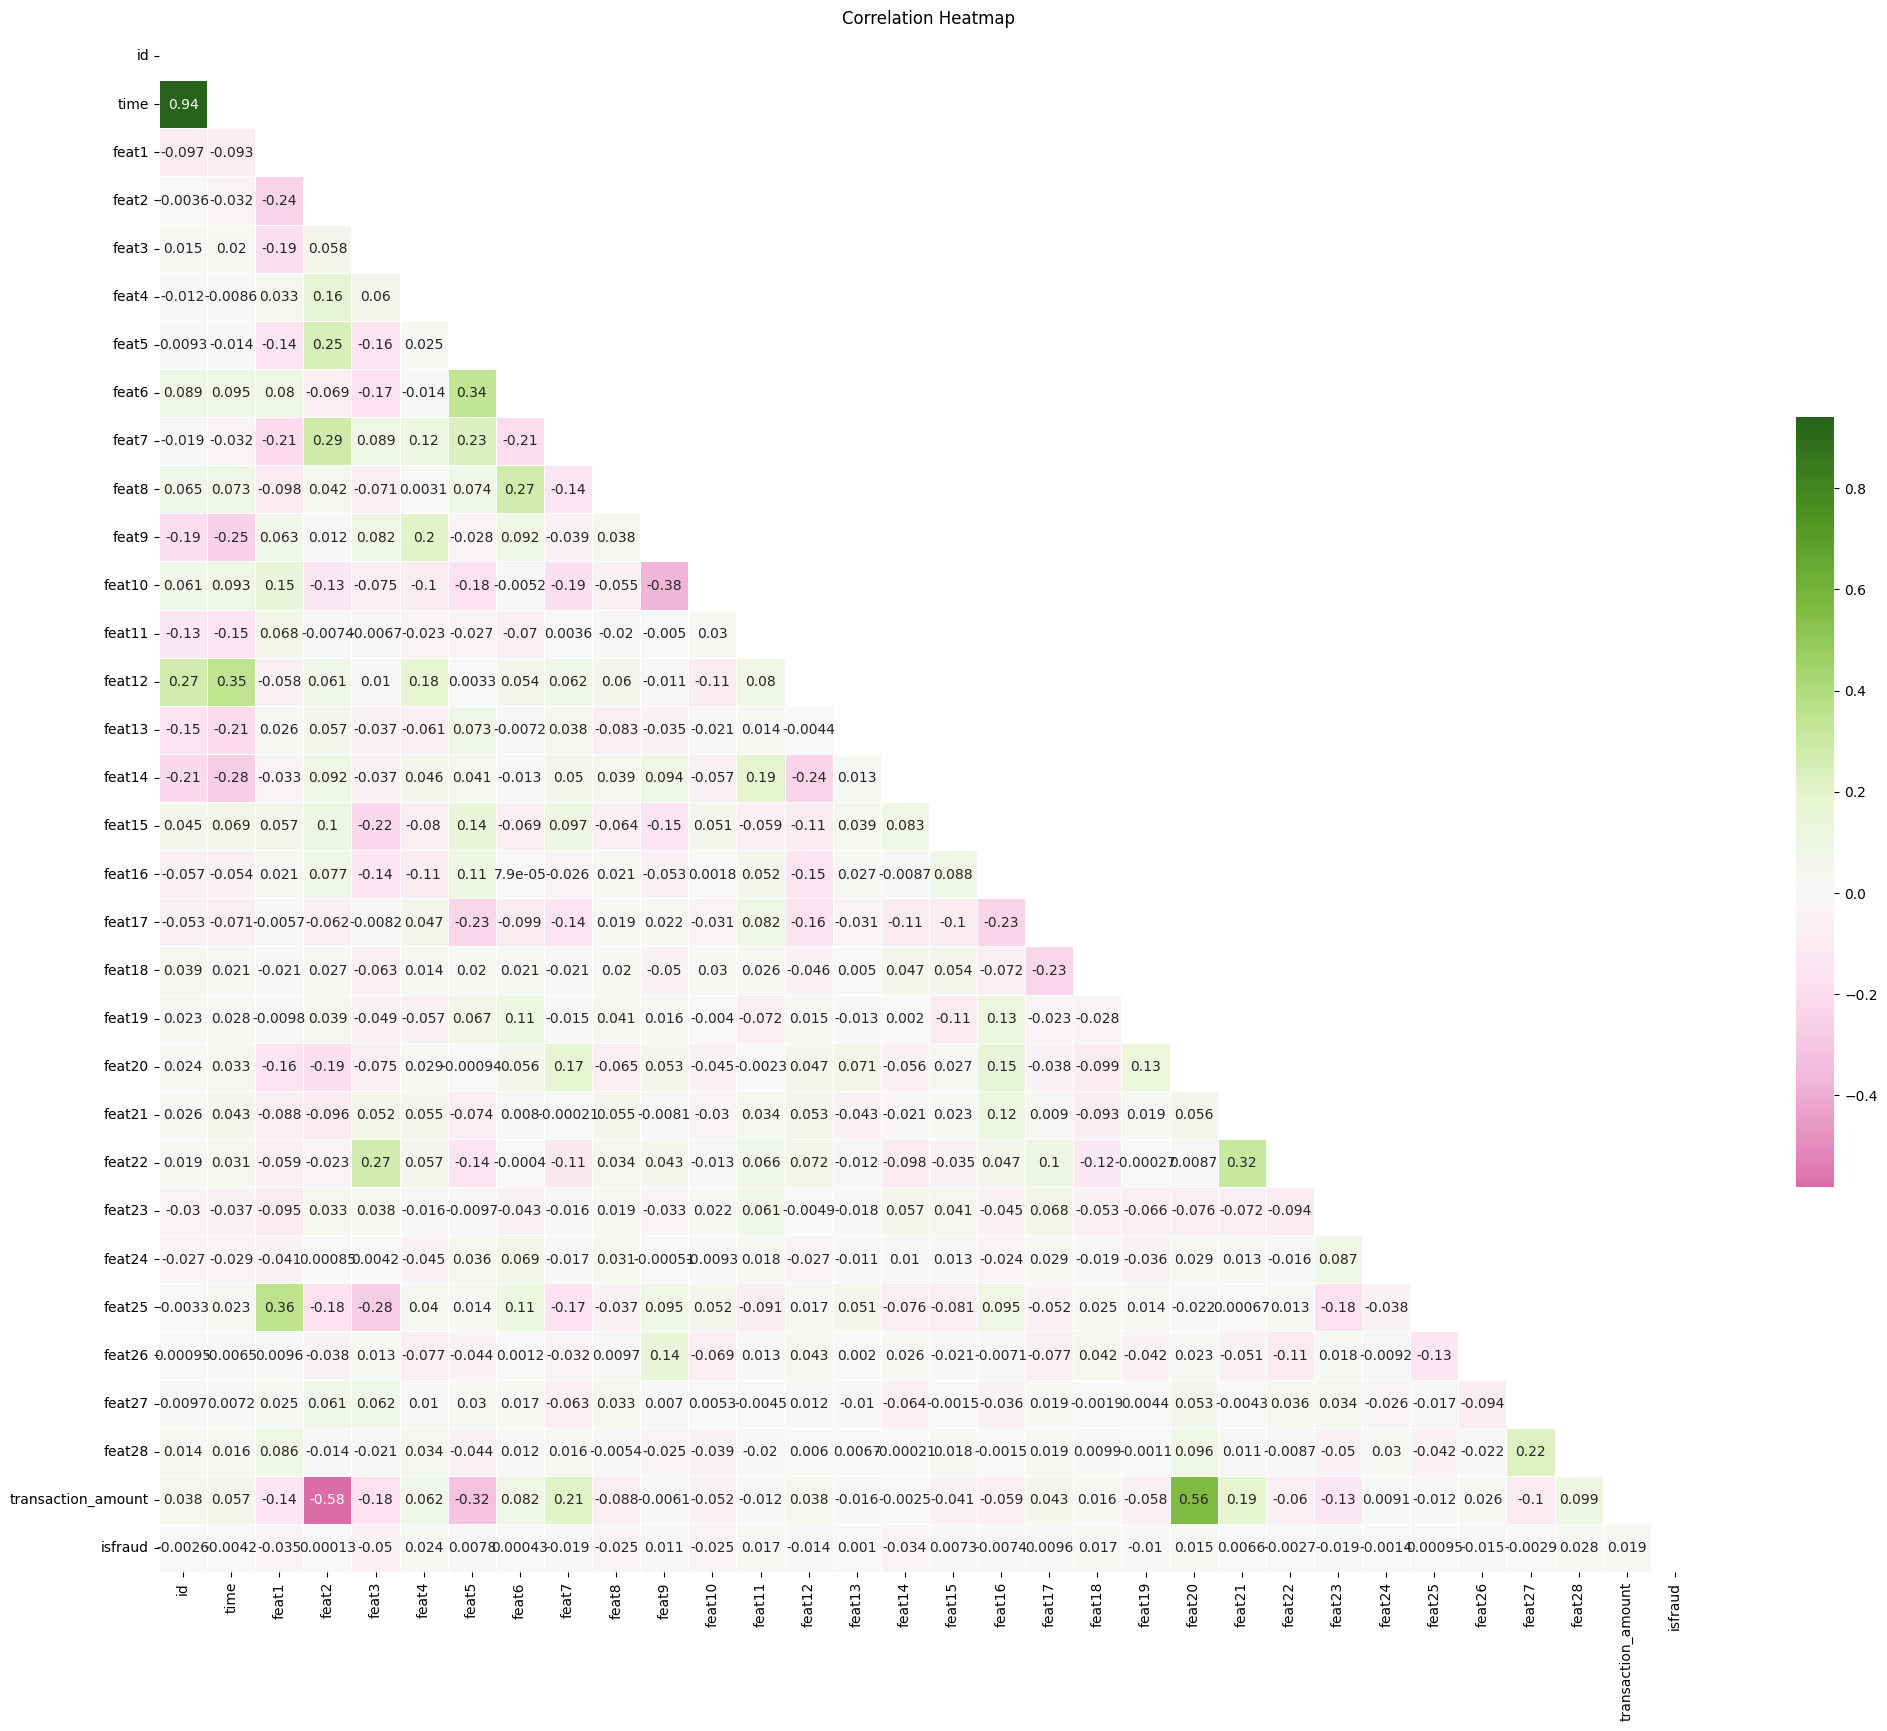

In [9]:
# heatmap to understand the correlation between the variables
plt.figure(figsize=(25, 20))
correlation_matrix = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, cmap='PiYG', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

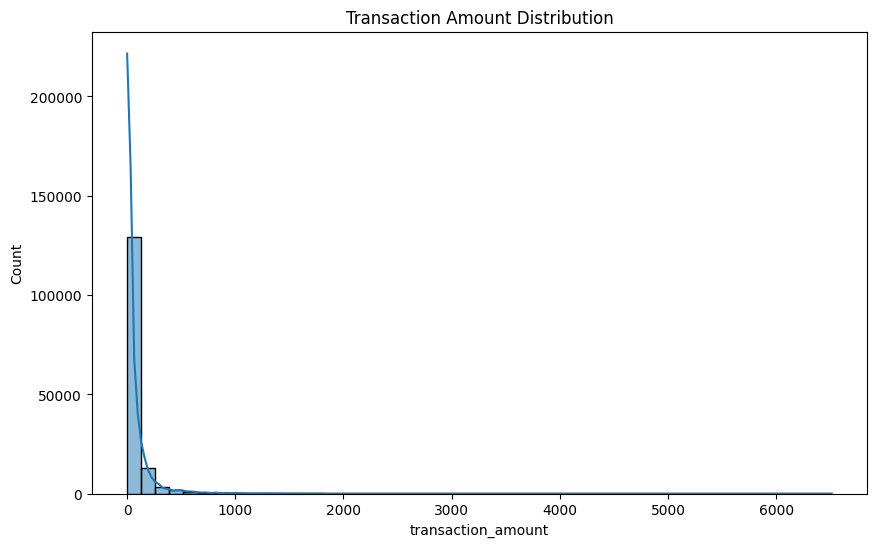

In [10]:
# Distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(train['transaction_amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

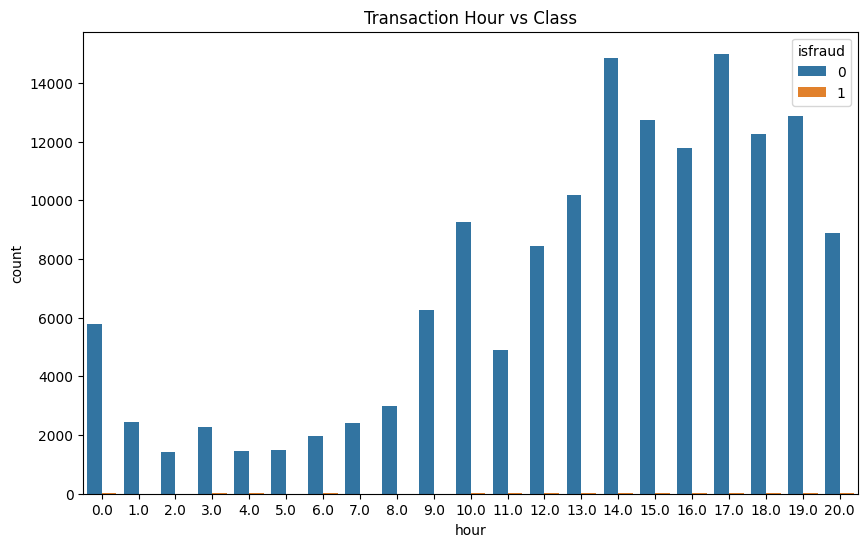

In [11]:
# creating a feature for transaction hour
sample = train.copy(deep=True)
sample['hour'] = sample['time'].apply(lambda x: divmod(x, 3600)[0] % 24)

# Visualizing the new 'hour' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='isfraud', data=sample)
plt.title('Transaction Hour vs Class')
plt.show()

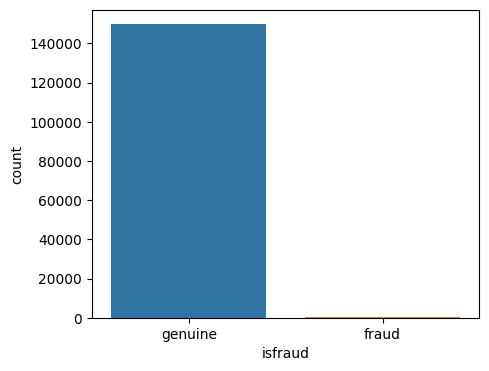

,isfraud,count
0,genuine,149731
1,fraud,269


In [12]:
# exploring class distribution
class_df = train.isfraud.value_counts().reset_index()
class_df.isfraud = class_df.isfraud.replace(1,"fraud")
class_df.isfraud = class_df.isfraud.replace(0,"genuine")
fig, ax = plt.subplots(figsize=(5,4))
bars = sns.barplot(class_df,x="isfraud",y="count",hue="isfraud")
plt.show()

class_df

## Handling imbalance using SMOTE

In [15]:
# Separate features and target variable
X = train.drop('isfraud', axis=1)
y = train['isfraud']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after resampling
print(pd.Series(y_resampled).value_counts())


isfraud
0    149731
1    149731
Name: count, dtype: int64


## Modeling

ROC AUC: 0.9999995324013247


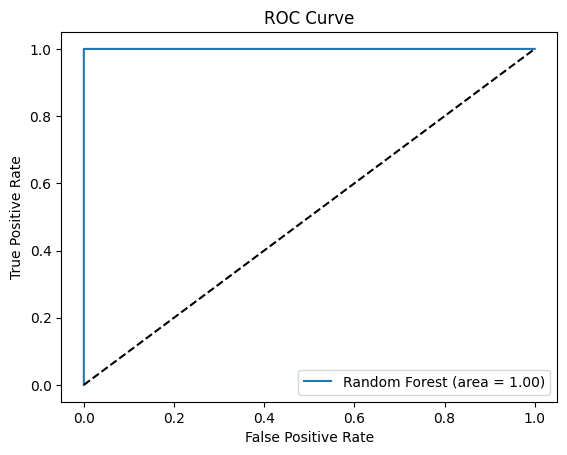

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

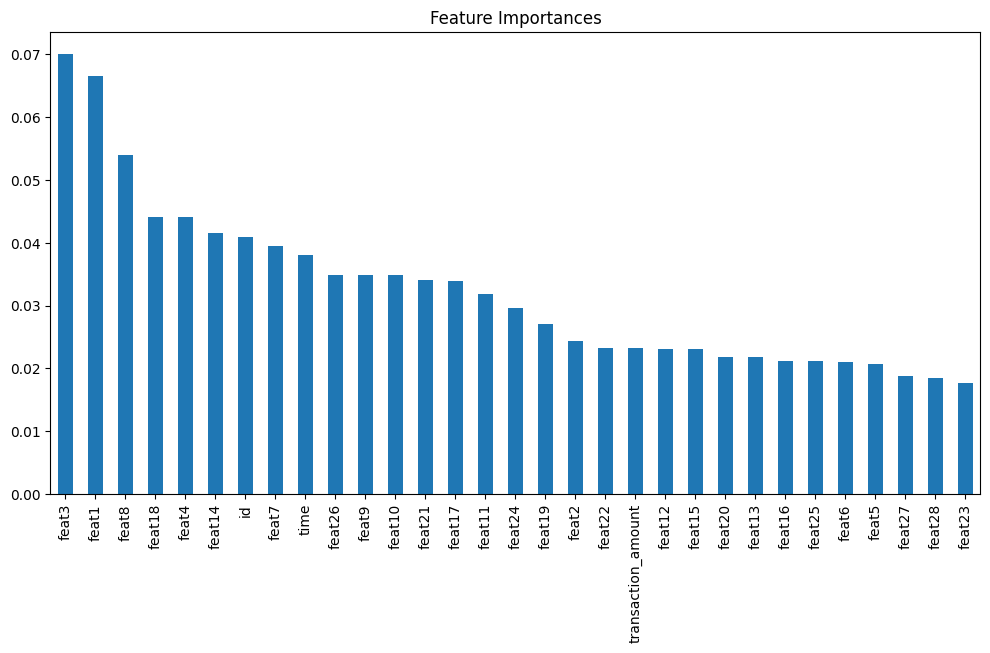

In [17]:
# Feature importance for Random Forest
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

### Find best model

In [19]:
# Define models and parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Grid Search for hyperparameter tuning
best_estimators = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], scoring='roc_auc', cv=5)
    grid.fit(X_train, y_train)
    best_estimators[model_name] = grid.best_estimator_
    print(f'{model_name} best parameters: {grid.best_params_}')
    print(f'{model_name} best ROC AUC: {grid.best_score_}')


Logistic Regression best parameters: {'C': 10}
Logistic Regression best ROC AUC: 0.8480528535202033
Decision Tree best parameters: {'max_depth': 15}
Decision Tree best ROC AUC: 0.9772873558333395
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 200}
Random Forest best ROC AUC: 0.9999799679862965
Gradient Boosting best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Gradient Boosting best ROC AUC: 0.9796005776027196


In [20]:
for model_name, model in best_estimators.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f'{model_name} ROC AUC on test set: {roc_auc}')

Logistic Regression ROC AUC on test set: 0.8476547785440036
Decision Tree ROC AUC on test set: 0.9785431798978779
Random Forest ROC AUC on test set: 0.9999906415836924
Gradient Boosting ROC AUC on test set: 0.9802298026203794


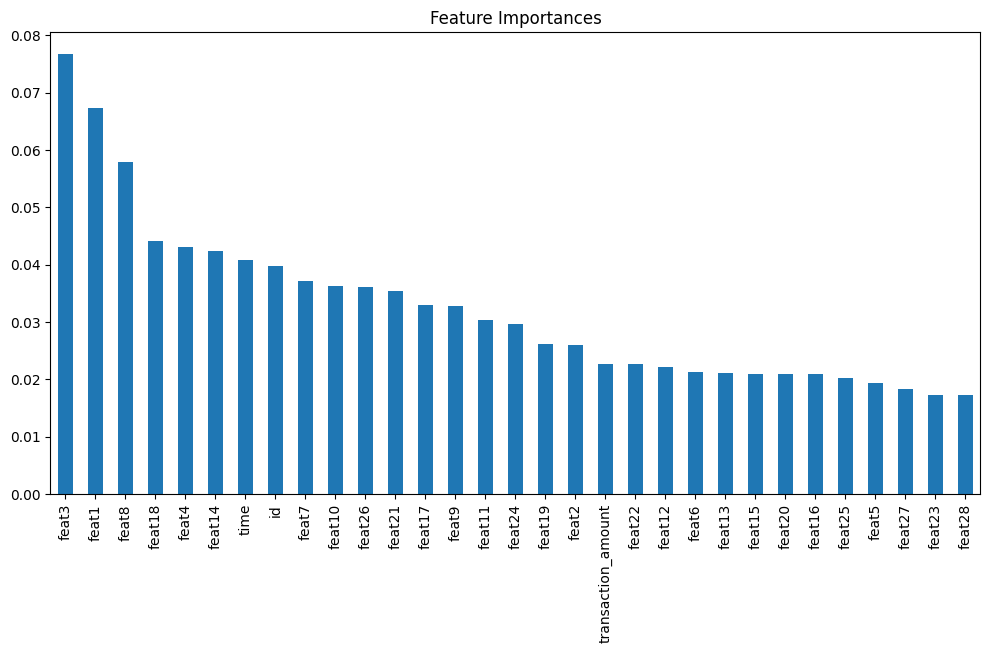

In [21]:
# Feature importance for Random Forest
feature_importances = pd.Series(best_estimators['Random Forest'].feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

### Exploring best model - Random Forest Classifier

Random Forest ROC AUC: 0.9999906415836924


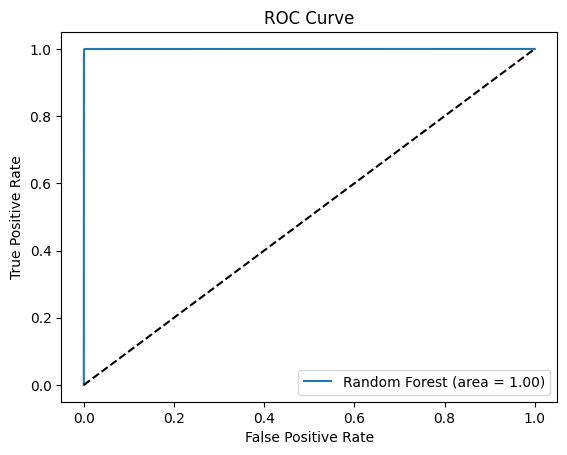

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44845
           1       1.00      1.00      1.00     44994

    accuracy                           1.00     89839
   macro avg       1.00      1.00      1.00     89839
weighted avg       1.00      1.00      1.00     89839



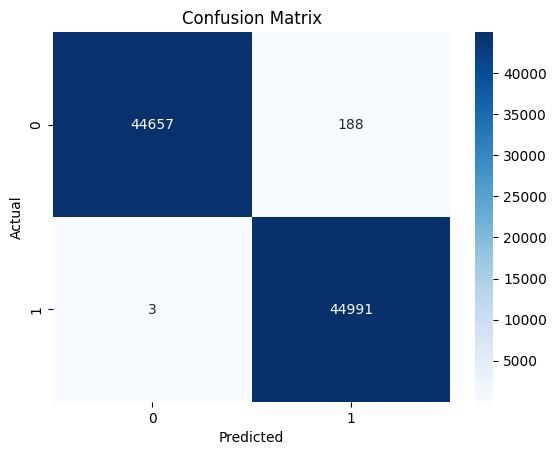

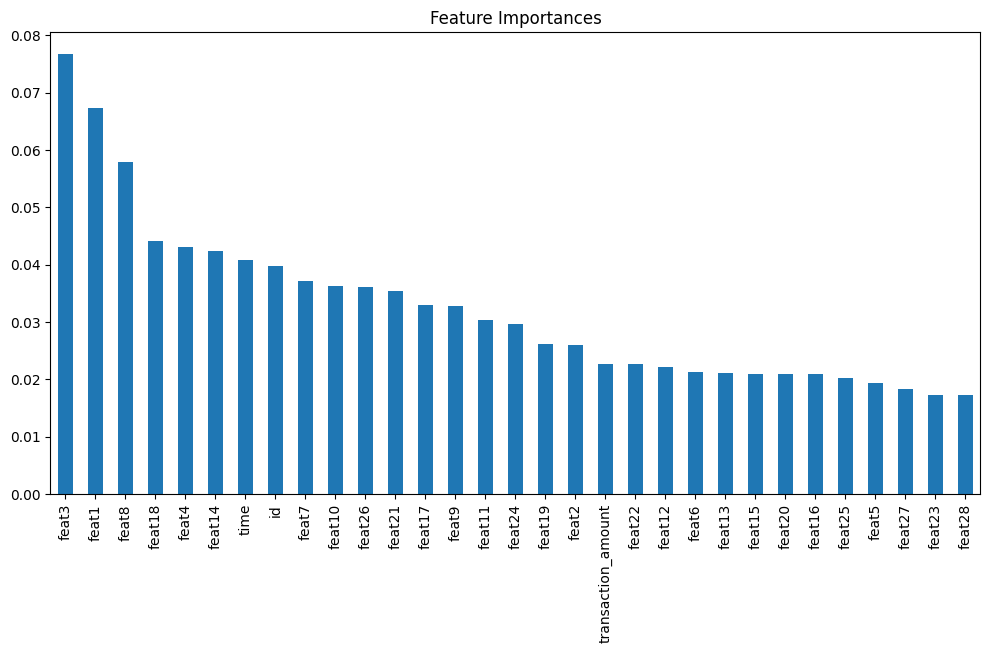

In [27]:
# Best parameters and estimator
best_rf = best_estimators['Random Forest']

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# # SHAP values for model interpretation
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")
# shap.summary_plot(shap_values[1], X_test)

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
# average_precision = average_precision_score(y_test, y_pred_prob)
# plt.step(recall, precision, where='post')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

### Second Iteration - Reducing Overfitting

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validated ROC AUC: 0.9939243303182586
Random Forest ROC AUC: 0.7153589767479955


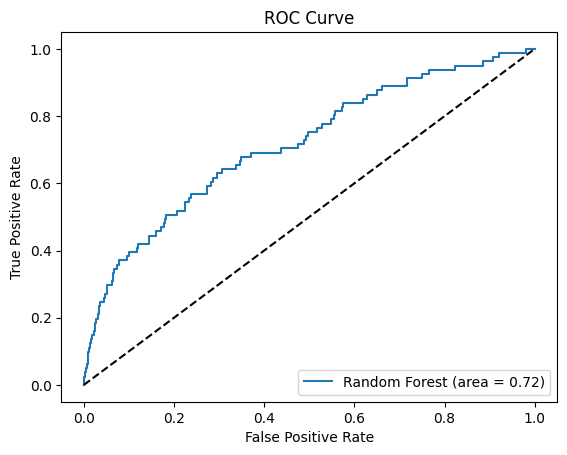

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     44919
           1       0.01      0.19      0.02        81

    accuracy                           0.97     45000
   macro avg       0.51      0.58      0.50     45000
weighted avg       1.00      0.97      0.98     45000



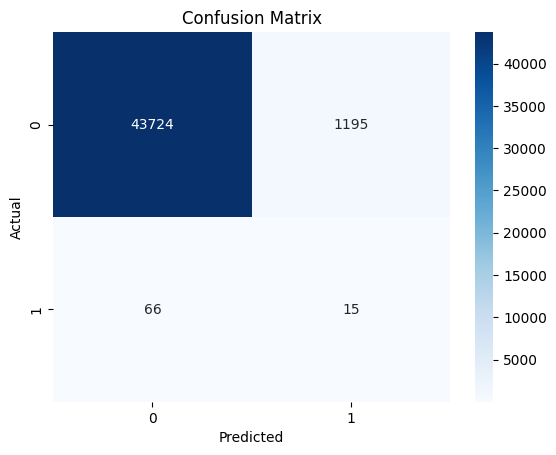

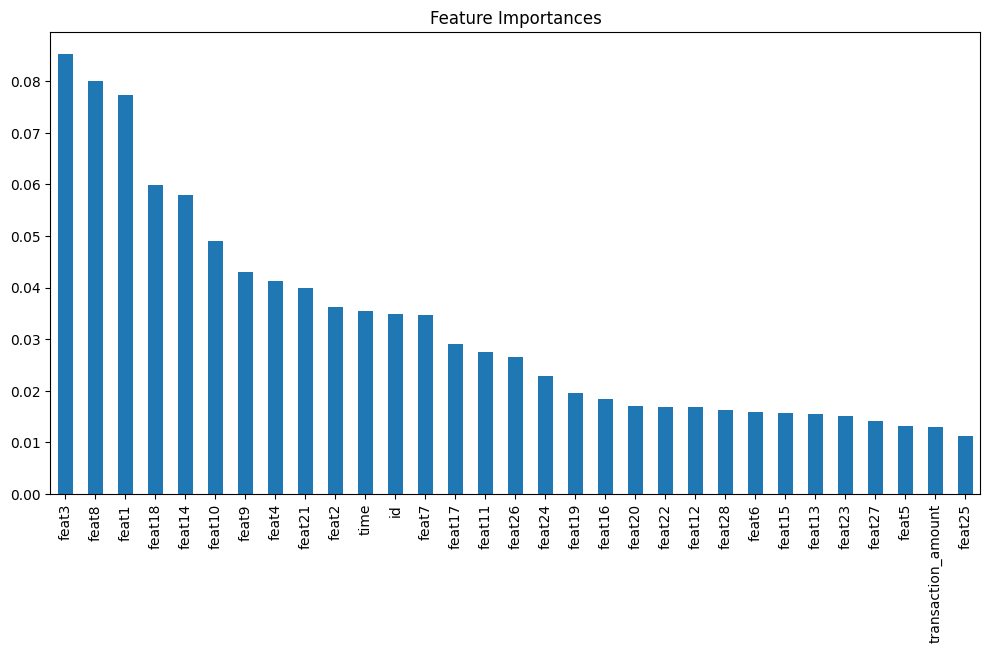

In [8]:
# Separate features and target variable
X = train.drop('isfraud', axis=1)
y = train['isfraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Random Forest model and parameter grid with more conservative settings
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],  # fewer trees to reduce complexity
    'max_depth': [5, 10],  # shallower trees
    'min_samples_split': [5, 10],  # larger minimum samples to split
    'min_samples_leaf': [4, 8]  # larger minimum samples per leaf
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate with cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f'Cross-validated ROC AUC: {cv_scores.mean()}')

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# # SHAP values for model interpretation
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")
# shap.summary_plot(shap_values[1], X_test)

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
# average_precision = average_precision_score(y_test, y_pred_prob)
# plt.step(recall, precision, where='post')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
# plt.show()


## Prediction on Test

In [ ]:
sample_submission = pd.read_csv(r"../data/sample_submission.csv")
sample_submission.head()

,id,IsFraud
0,150000,0.5
1,150001,0.5
2,150002,0.5
3,150003,0.5
4,150004,0.5


In [9]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

submission_prob = best_rf.predict_proba(test)[:, 1]
test['IsFraud'] = submission_prob.round(1)
submission = test[['id','IsFraud']]
submission.to_csv(r"../data/submission_with_smote.csv",index=False)